In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

--2020-12-16 18:52:08--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 864710 (844K) [text/plain]
Saving to: ‘ikea.csv’

ikea.csv            100%[===================>] 844.44K  --.-KB/s    in 0.04s   

2020-12-16 18:52:08 (20.3 MB/s) - ‘ikea.csv’ saved [864710/864710]



In [ ]:
df=pd.read_csv('ikea.csv')
df.head(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


DEPTH,HEIGHT AND WIDTH features contain null values

In [ ]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [ ]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


Text(0, 0.5, 'price')

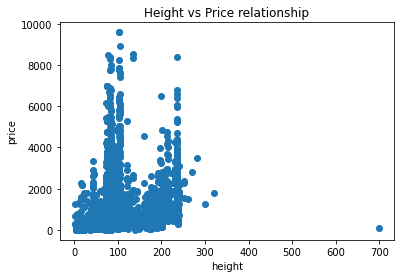

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['height'],df['price'])
plt.title("Height vs Price relationship")
plt.xlabel("height")
plt.ylabel("price")

there is one outlier with value 700.We will eliminate it further.

Text(0, 0.5, 'price')

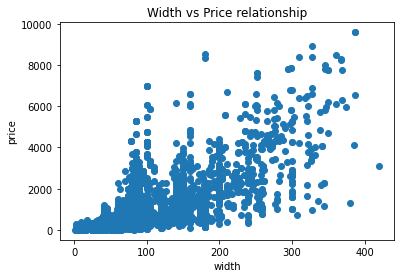

In [ ]:
plt.scatter(df['width'],df['price'])
plt.title("Width vs Price relationship")
plt.xlabel("width")
plt.ylabel("price")

Text(0, 0.5, 'price')

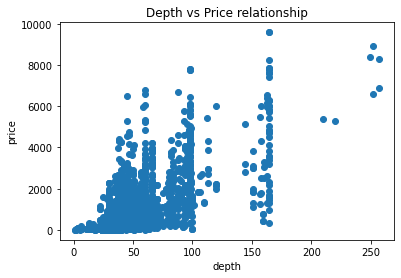

In [ ]:
plt.scatter(df['depth'],df['price'])
plt.title("Depth vs Price relationship")
plt.xlabel("depth")
plt.ylabel("price")

there are clearly outliers,which should be removed from the dataset

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='width', y='depth', z='price',
              color='category')
fig.show()

The more depth and width,the more the price of the furniture.The most expensive items are bookcases & shelving units.

#HYPOTHESIS TESTING

***first hypothesis:***

Here, we are going to test if the mean of prices of items that have other colors is different from the mean of prices of items that contain only one color.


 **m_other_colors** is the mean of prices of items that contain other colors and **m_no_other_colors** is the mean of prices of items that doesn't contain only one color.

null hypothesis H0: m1-m2=0(assumption that there is no difference)

alternative hypothesis H1: m1-m2!=0

significance level will be 5% or 0.05

In [ ]:
m_other_colors =np.mean(df[df['other_colors']=='Yes']['price'])

m_no_other_colors=np.mean(df[df['other_colors']=='No']['price'])

s_other_colors=np.std(df[df['other_colors']=='Yes']['price'])

s_no_other_colors=np.std(df[df['other_colors']=='No']['price'])

In [ ]:
n_other_colors=len(df[df['other_colors']=='Yes'])

n_no_other_colors=len(df[df['other_colors']=='No'])

Firstly,we need to calculate test statistic

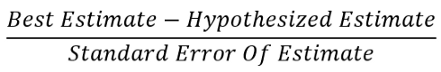

SEE is calculated like:

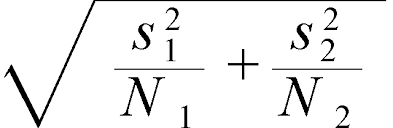

In [ ]:
se = np.sqrt(((s_other_colors**2)/n_other_colors)+((s_no_other_colors**2)/n_no_other_colors))

In [ ]:
best_estimate=m_other_colors-m_no_other_colors

hypothesized_estimate=0

test_statistic=(best_estimate-hypothesized_estimate)/se

In [ ]:
import scipy.stats

p_value=scipy.stats.t.sf(abs(test_statistic), df=2)

In [ ]:
p_value

0.019385332601215367

P VALUE is less than significance level,which is 0.05

IT MEANS we can fully reject null hypothesis.

**second hypothesis:**

Here,we are going to compare the means of prices of each category of item.Since we have more than 2 categories,we will have more than 2 means,so we need to generalize t-test to get multiple means.ANOVA is the best solution for this case.


null hypothesis H0: m1=m2=m3=m4=.....=m17

alternative hypothesis H1: at least one mean is different from others

In [ ]:
pip install pingouin

In [ ]:
import pingouin as pg
aov=pg.anova(dv='price', between='category', data=df,
               detailed=False)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,category,16,3677,44.175971,1.701733e-127,0.161233


p value is high,so we can't reject the hypothesis,that categories are not significantly different from each other

It can be good decision to just drop the column 'category',but,however,it will be used.I just want to compare the model's behaviour including this category and without it.

#FEATURE EXTRACTION

In [ ]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

Only 28 items can't be sold online,so it's better to eliminate this feature,because it doesn't have any statistical value

In [ ]:
df['old_price'].value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,275           1
SR 1,182           1
SR 39              1
SR 1,460           1
SR 5,610           1
Name: old_price, Length: 365, dtype: int64

Let's change values in OLD_PRICE into EXIST and NOT EXIST

In [ ]:
df['other_colors'].value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

In [ ]:
df.drop(['Unnamed: 0','item_id','name','sellable_online','link','short_description','designer'],axis=1,inplace=True)

In [ ]:
df

,category,price,old_price,other_colors,depth,height,width
0,Bar furniture,265.0,No old price,No,NaN,99.0,51.0
1,Bar furniture,995.0,No old price,No,NaN,105.0,80.0
2,Bar furniture,2095.0,No old price,No,NaN,NaN,NaN
3,Bar furniture,69.0,No old price,Yes,50.0,100.0,60.0
4,Bar furniture,225.0,No old price,No,60.0,43.0,74.0
...,...,...,...,...,...,...,...
3689,Wardrobes,750.0,SR 820,No,50.0,NaN,91.0
3690,Wardrobes,1572.0,"SR 1,755",No,50.0,NaN,135.0
3691,Wardrobes,924.0,"SR 1,050",No,50.0,NaN,175.0
3692,Wardrobes,2745.0,"SR 3,130",No,50.0,NaN,178.0


In [ ]:
df=df[df['height']!=700]

In [ ]:
df=df[df['depth']<200]

Filling NaN values with mean of certain column

In [ ]:
df['depth']=df['depth'].fillna(df['depth'].mean())
df['width']=df['width'].fillna(df['width'].mean())
df['height']=df['height'].fillna(df['height'].mean())

In [ ]:
cats=pd.get_dummies(df['category'],prefix='category')

In [ ]:
df=pd.concat([df,cats],axis=1)

In [ ]:
df

,category,price,old_price,other_colors,depth,height,width,category_Bar furniture,category_Beds,category_Bookcases & shelving units,category_Cabinets & cupboards,category_Café furniture,category_Chairs,category_Chests of drawers & drawer units,category_Children's furniture,category_Nursery furniture,category_Outdoor furniture,category_Room dividers,"category_Sideboards, buffets & console tables",category_Sofas & armchairs,category_TV & media furniture,category_Tables & desks,category_Trolleys,category_Wardrobes
3,Bar furniture,69.0,No old price,Yes,50.0,100.000000,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bar furniture,225.0,No old price,No,60.0,43.000000,74.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bar furniture,345.0,No old price,No,45.0,91.000000,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bar furniture,129.0,No old price,No,44.0,95.000000,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bar furniture,195.0,No old price,No,50.0,113.010433,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Wardrobes,750.0,SR 820,No,50.0,113.010433,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3690,Wardrobes,1572.0,"SR 1,755",No,50.0,113.010433,135.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3691,Wardrobes,924.0,"SR 1,050",No,50.0,113.010433,175.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3692,Wardrobes,2745.0,"SR 3,130",No,50.0,113.010433,178.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(['category'],axis=1,inplace=True)

In [ ]:
df['other_colors']=df['other_colors'].map({'Yes':1,'No':0})

In [ ]:
df.reset_index(drop=True,inplace=True)

Changing values of No old price with 0,and other values with 1

In [ ]:
old_price=[]
for o_p in df['old_price']:
  if o_p=='No old price':
    old_price.append(0)
  else:
    old_price.append(1)  

In [ ]:
old_price=pd.Series(old_price)

In [ ]:
old_price

0       0
1       0
2       0
3       0
4       0
       ..
2219    1
2220    1
2221    1
2222    1
2223    1
Length: 2224, dtype: int64

In [ ]:
df=pd.concat([df,old_price],axis=1)

In [ ]:
df.drop(['old_price'],axis=1,inplace=True)

In [ ]:
df.columns=['price','other_colors','depth','height','width','category_Bar furniture','category_Beds','category_Bookcases & shelving units','category_Cabinets & cupboards','category_Café furniture','category_Chairs','category_Chests of drawers & drawer units','category_Childrens furniture','category_Nursery furniture','category_Outdoor furniture','category_Room dividers','category_Sideboards, buffets & console tables','category_Sofas & armchairs','category_TV & media furniture','category_Tables & desks','category_Trolleys','category_Wardrobes','old_price']

In [ ]:
df=df.astype(int)

In [ ]:
df

,price,other_colors,depth,height,width,category_Bar furniture,category_Beds,category_Bookcases & shelving units,category_Cabinets & cupboards,category_Café furniture,category_Chairs,category_Chests of drawers & drawer units,category_Childrens furniture,category_Nursery furniture,category_Outdoor furniture,category_Room dividers,"category_Sideboards, buffets & console tables",category_Sofas & armchairs,category_TV & media furniture,category_Tables & desks,category_Trolleys,category_Wardrobes,old_price
0,69,1,50,100,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,225,0,60,43,74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,345,0,45,91,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,129,0,44,95,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,195,0,50,113,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,750,0,50,113,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2220,1572,0,50,113,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2221,924,0,50,113,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2222,2745,0,50,113,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict

In [ ]:
for model,name in zip([LinearRegression(),KNeighborsRegressor(),SVR()],["LR","KNR","SVR"]):
  pipeline=Pipeline([('scaler',StandardScaler()),
                   ('model',model)])
  scores=cross_validate(pipeline,X,y,cv=20)
  scores=scores['fit_time']
  print(name+" score is: "+str(scores.mean()))

LRscore is: 0.007415664196014404
KNRscore is: 0.013905394077301025
SVRscore is: 0.44361511468887327


SVR is more suited to small data,and thats why it gives good results

Let's get rid of category features and see what happens!

In [ ]:
f=df.copy()

In [ ]:
f.drop(['category_Bar furniture','category_Beds','category_Bookcases & shelving units','category_Cabinets & cupboards','category_Café furniture','category_Chairs','category_Chests of drawers & drawer units','category_Childrens furniture','category_Nursery furniture','category_Outdoor furniture','category_Room dividers','category_Sideboards, buffets & console tables','category_Sofas & armchairs','category_TV & media furniture','category_Tables & desks','category_Trolleys','category_Wardrobes'],axis=1,inplace=True)

In [ ]:
f

,price,other_colors,depth,height,width,old_price
0,69,1,50,100,60,0
1,225,0,60,43,74,0
2,345,0,45,91,40,0
3,129,0,44,95,50,0
4,195,0,50,113,50,0
...,...,...,...,...,...,...
2219,750,0,50,113,91,1
2220,1572,0,50,113,135,1
2221,924,0,50,113,175,1
2222,2745,0,50,113,178,1


In [ ]:
X=f[["other_colors","depth","height","width","old_price"]]
y=f.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

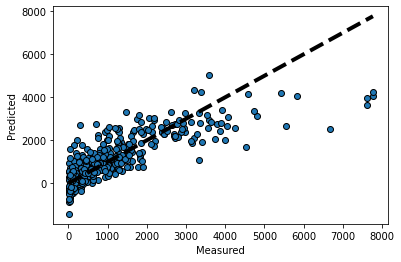

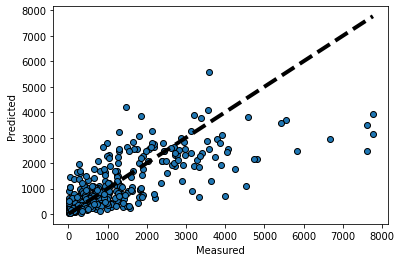

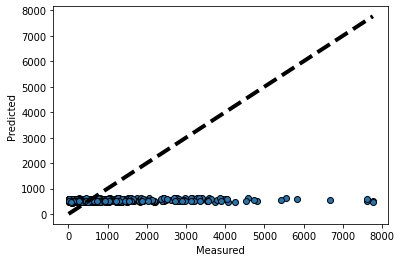

In [ ]:
for model,name in zip([LinearRegression(),KNeighborsRegressor(),SVR()],["LR","KNR","SVR"]):
  pipeline=Pipeline([('scaler',StandardScaler()),
                   ('model',model)])
  scores=cross_validate(pipeline,X_train,y_train,cv=20)
  predicted=cross_val_predict(pipeline,X_test,y_test)
  fig, ax = plt.subplots()
  ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.show()

SVM was overfitted and thats why it didnt give good result in testing.LR would be used as it gives more satisfactory result

In [ ]:
from sklearn.metrics import mean_squared_error
pipeline=Pipeline([('scaler',StandardScaler()),
                   ('model',LinearRegression())])
scores=cross_validate(pipeline,X_train,y_train,cv=20)
predicted=cross_val_predict(pipeline,X_test,y_test)
loss=mean_squared_error(y_test,predicted)

In [ ]:
average_loss=loss/len(y_test)

In [ ]:
average_loss

1282.765379246428